# **CLUSTERING ANALYSIS**

# **Import Basic DATASET**

In [92]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Preprocessing**

# **Load the Dataset**

In [93]:
pip install pandas openpyxl


In [94]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Display the first few rows of the dataframe
print(data.head())


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [95]:
#Print table
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [96]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# **Drop**

In [97]:
# Drop a column by name
data = data.drop(columns=['ID#'])

In [98]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# **Handle Missing Values**

In [99]:
# Check for missing values
data.isnull().sum()



,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


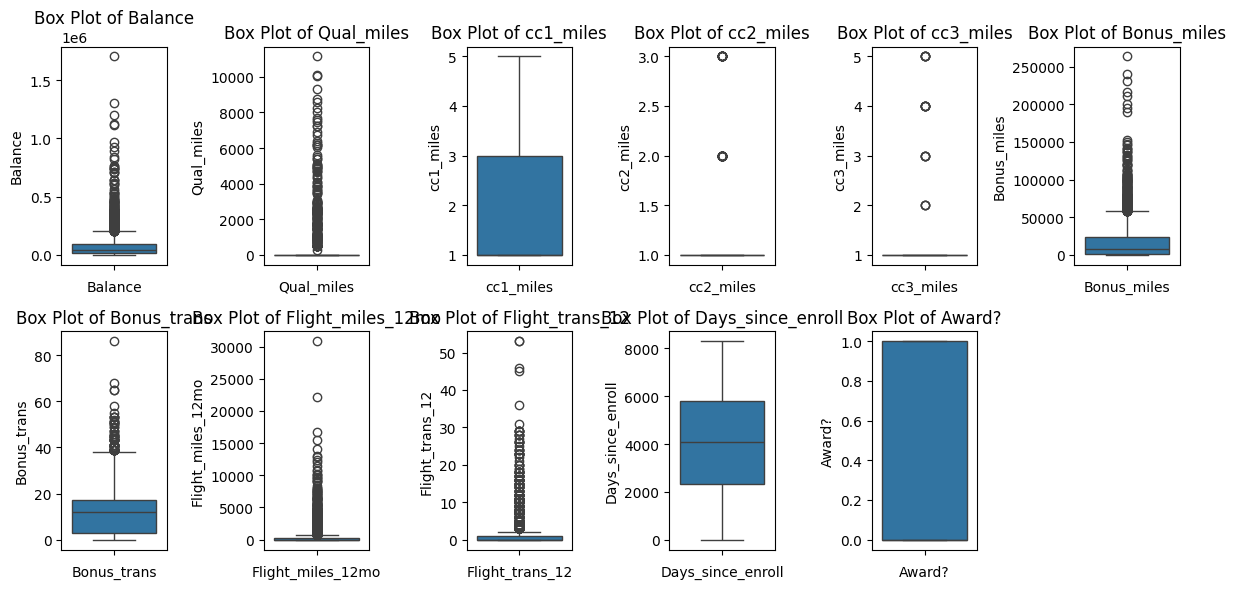

In [100]:
# Create box plots for each numerical column
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, (len(data.select_dtypes(include=['float64', 'int64']).columns) + 1) // 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [101]:
# Drop a column by name
data = data.drop(columns=['Balance','Qual_miles','Flight_miles_12mo','Flight_trans_12','Bonus_miles'])

In [102]:
data

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
0,1,1,1,1,7000,0
1,1,1,1,2,6968,0
2,1,1,1,4,7034,0
3,1,1,1,1,6952,0
4,4,1,1,26,6935,1
...,...,...,...,...,...,...
3994,1,1,1,4,1403,1
3995,1,1,1,5,1395,1
3996,3,1,1,8,1402,1
3997,1,1,1,1,1401,0


# **Removing outliers using Z-score**

In [103]:
from scipy import stats

# Removing outliers using Z-score
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


# **Feature Scaling**

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


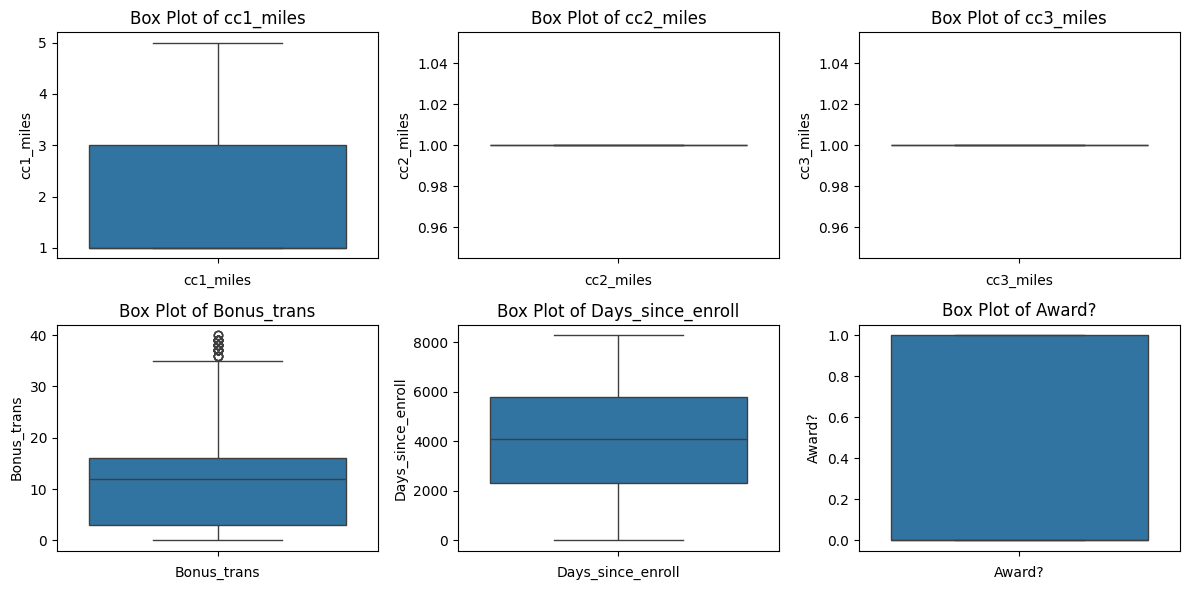

In [105]:
# Create box plots for each numerical column
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, (len(data.select_dtypes(include=['float64', 'int64']).columns) + 1) // 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [106]:
data


,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
0,1,1,1,1,7000,0
1,1,1,1,2,6968,0
2,1,1,1,4,7034,0
3,1,1,1,1,6952,0
4,4,1,1,26,6935,1
...,...,...,...,...,...,...
3994,1,1,1,4,1403,1
3995,1,1,1,5,1395,1
3996,3,1,1,8,1402,1
3997,1,1,1,1,1401,0


In [107]:
data.describe()

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
count,3895.000000,3895.0,3895.0,3895.000000,3895.000000,3895.000000
mean,2.045443,1.0,1.0,11.053659,4115.967651,0.364827
std,1.364582,0.0,0.0,8.676693,2065.099090,0.481443
min,1.000000,1.0,1.0,0.000000,2.000000,0.000000
25%,1.000000,1.0,1.0,3.000000,2330.000000,0.000000
50%,1.000000,1.0,1.0,12.000000,4104.000000,0.000000
75%,3.000000,1.0,1.0,16.000000,5784.500000,1.000000
max,5.000000,1.0,1.0,40.000000,8296.000000,1.000000


# **Exploratory Data Analysis (EDA)**

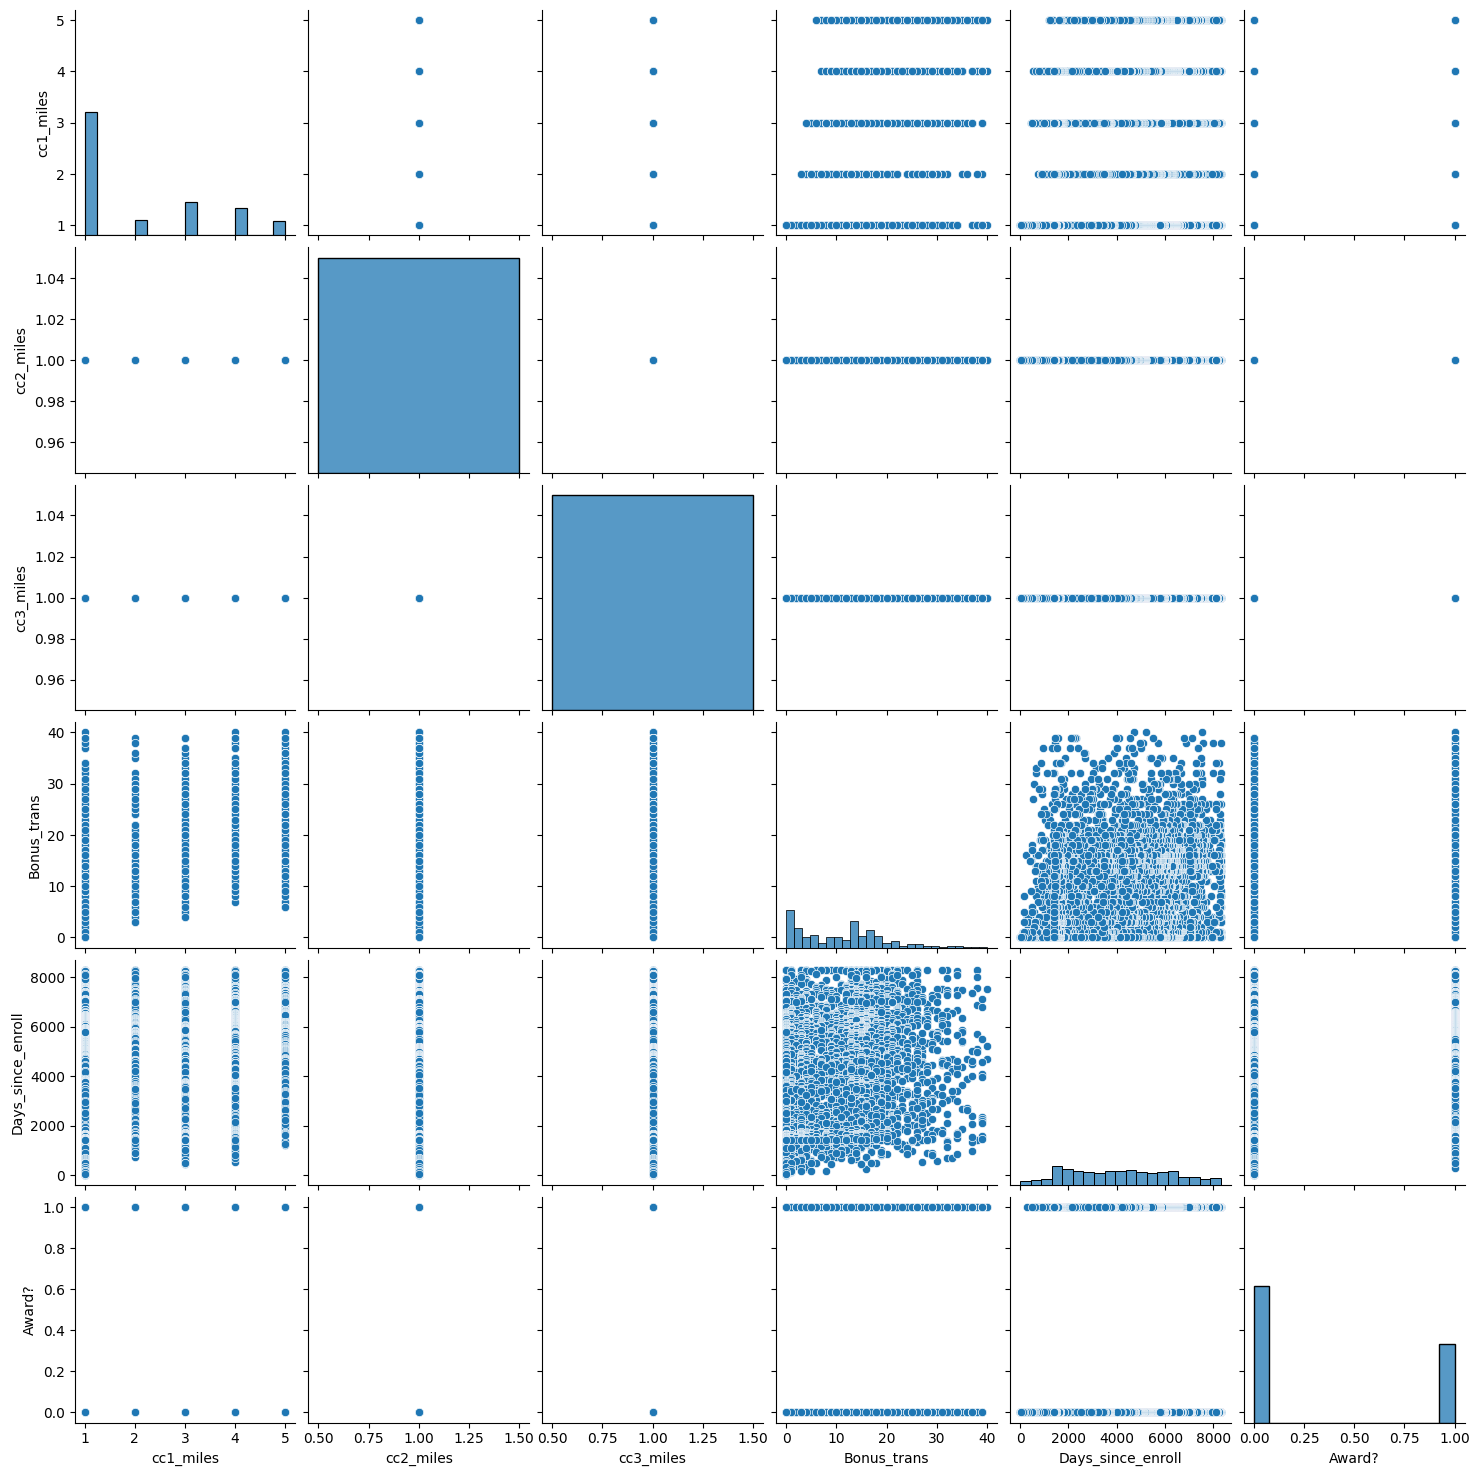

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()



# **2. Implementing Clustering Algorithms**

# **K-Means Clustering**

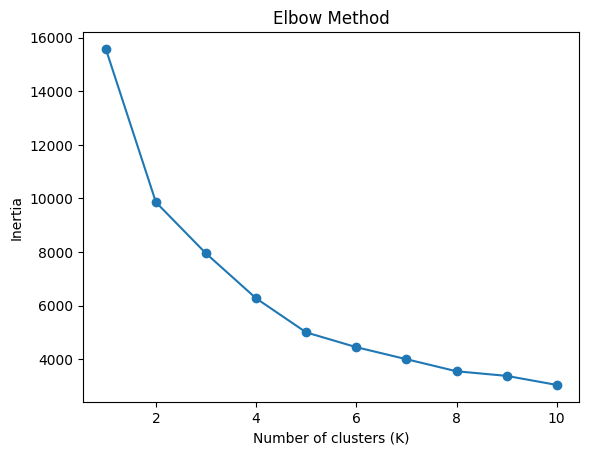

In [109]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Fit K-Means with optimal K
optimal_k = 3  # Example value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)


# **Hierarchical Clustering**

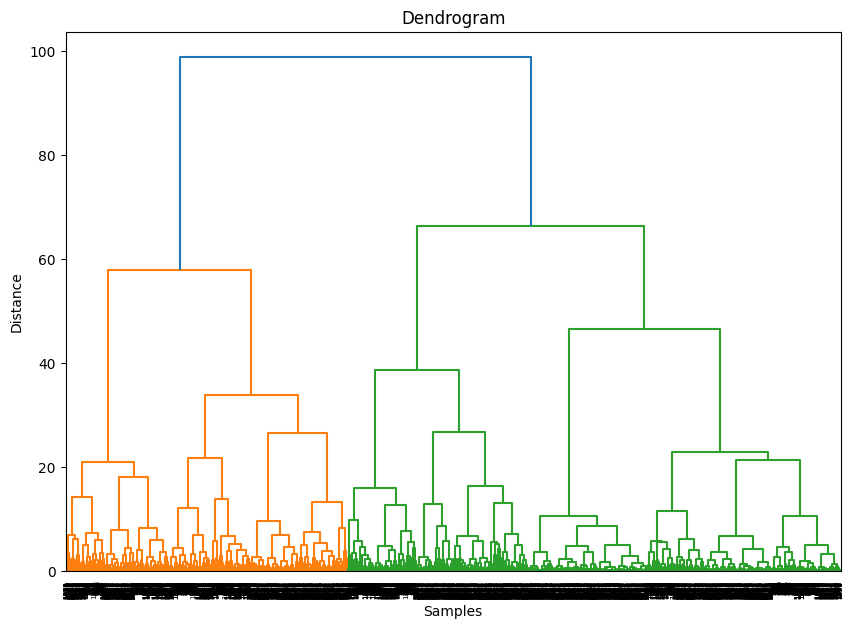

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(data_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(data_scaled)


In [111]:
# Fit hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(data_scaled)

# Assign cluster labels to a new column in the DataFrame
data['h_clusterid'] = clusters_hierarchical # This line is crucial, and it adds the cluster labels generated by hierarchical clustering to the dataframe

# Now you should be able to count the values in the 'h_clusterid' column:
data.h_clusterid.value_counts()

<ipython-input-111-1fd987fdc91b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['h_clusterid'] = clusters_hierarchical # This line is crucial, and it adds the cluster labels generated by hierarchical clustering to the dataframe


,count
h_clusterid,
1,1574
0,1421
2,900


In [112]:
data


,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?,h_clusterid
0,1,1,1,1,7000,0,1
1,1,1,1,2,6968,0,1
2,1,1,1,4,7034,0,1
3,1,1,1,1,6952,0,1
4,4,1,1,26,6935,1,0
...,...,...,...,...,...,...,...
3994,1,1,1,4,1403,1,0
3995,1,1,1,5,1395,1,0
3996,3,1,1,8,1402,1,0
3997,1,1,1,1,1401,0,1


In [113]:
data.sort_values("h_clusterid")

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?,h_clusterid
1123,5,1,1,15,5658,1,0
1084,2,1,1,12,5587,1,0
1083,1,1,1,16,5492,1,0
2594,4,1,1,23,2720,1,0
3180,1,1,1,15,2473,1,0
...,...,...,...,...,...,...,...
989,3,1,1,19,5842,0,2
988,3,1,1,15,5843,0,2
987,3,1,1,12,5847,0,2
3470,1,1,1,12,1032,0,2


In [114]:
data[data.h_clusterid==2]

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?,h_clusterid
6,3,1,1,25,6994,0,2
10,2,1,1,10,6959,0,2
12,2,1,1,20,6924,0,2
24,1,1,1,21,7932,0,2
30,3,1,1,13,7886,0,2
...,...,...,...,...,...,...,...
3974,3,1,1,39,1435,0,2
3980,3,1,1,28,1425,0,2
3985,4,1,1,25,1418,0,2
3991,3,1,1,28,1408,0,2


In [115]:
data.groupby('h_clusterid').mean()

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
h_clusterid,,,,,,
0,2.645320,1.0,1.0,14.788177,4622.992963,1.0
1,1.059085,1.0,1.0,4.263659,3758.258577,0.0
2,2.823333,1.0,1.0,17.032222,3941.024444,0.0


# **DBSCAN**

In [116]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters_dbscan = dbscan.fit_predict(data_scaled)


In [117]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [118]:
data = data.drop(columns=['h_clusterid'])
data.head()

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
0,1,1,1,1,7000,0
1,1,1,1,2,6968,0
2,1,1,1,4,7034,0
3,1,1,1,1,6952,0
4,4,1,1,26,6935,1


In [119]:
data['clusterId']=dbscan.labels_
data

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?,clusterId
0,1,1,1,1,7000,0,0
1,1,1,1,2,6968,0,0
2,1,1,1,4,7034,0,0
3,1,1,1,1,6952,0,0
4,4,1,1,26,6935,1,1
...,...,...,...,...,...,...,...
3994,1,1,1,4,1403,1,3
3995,1,1,1,5,1395,1,3
3996,3,1,1,8,1402,1,4
3997,1,1,1,1,1401,0,0


In [120]:
data['clusterId'].value_counts()

,count
clusterId,
0,1685
3,537
2,316
1,287
4,269
7,202
6,194
5,173
8,91


In [121]:
data.groupby('clusterId').mean()

,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?
clusterId,,,,,,
-1,3.088608,1.0,1.0,29.860759,4362.265823,0.443038
0,1.000000,1.0,1.0,5.454599,3557.928190,0.000000
1,4.000000,1.0,1.0,19.181185,4798.013937,1.000000
2,3.000000,1.0,1.0,15.389241,4215.022152,0.000000
3,1.000000,1.0,1.0,8.126629,4333.566108,1.000000
4,3.000000,1.0,1.0,16.390335,4433.721190,1.000000
5,2.000000,1.0,1.0,13.710983,4268.063584,0.000000
6,5.000000,1.0,1.0,21.025773,5553.654639,1.000000
7,4.000000,1.0,1.0,17.094059,4732.856436,0.000000


# **3. Cluster Analysis and Interpretation**

In [122]:
# Example for K-Means
cluster_centers = kmeans.cluster_centers_
print("K-Means Cluster Centers:\n", cluster_centers)

# Analyzing clusters
data['KMeans_Cluster'] = clusters_kmeans
cluster_analysis = data.groupby('KMeans_Cluster').mean()
#print(cluster_analysis)
cluster_analysis

K-Means Cluster Centers:
 [[ 1.23119349  0.          0.          0.95379757  0.41595964  0.4287234 ]
 [-0.6316851   0.          0.         -0.55799965 -0.28734449 -0.75787432]
 [-0.53472081  0.          0.         -0.22212016  0.02628139  1.31947999]]


,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award?,clusterId
KMeans_Cluster,,,,,,,
0,3.726989,1.0,1.0,19.338534,4979.992200,0.570203,3.756630
1,1.183567,1.0,1.0,6.212689,3522.648986,0.000000,0.489860
2,1.323188,1.0,1.0,9.152174,4164.188406,1.000000,3.727536


# **4. Visualization**

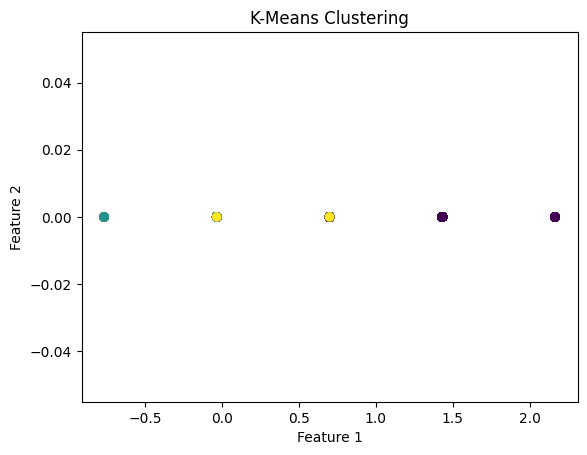

In [123]:
# K-Means visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Similar plots for Hierarchical and DBSCAN


# **5. Evaluation and Performance Metrics**

In [124]:
from sklearn.metrics import silhouette_score

# K-Means silhouette score
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print("K-Means Silhouette Score:", silhouette_kmeans)

# DBSCAN silhouette score
silhouette_dbscan = silhouette_score(data_scaled, clusters_dbscan)
print("DBSCAN Silhouette Score:", silhouette_dbscan)


K-Means Silhouette Score: 0.3301812985044056
DBSCAN Silhouette Score: 0.1441410553029904
